<a href="https://colab.research.google.com/github/pabloclaero/Prediccion-Videojuegos/blob/main/Proyecto_2_Pablo_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parte 1

In [26]:
import pandas as pd
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


1) Fuente de datos:

https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

2) Breve descripción de datos:

Esta base de datos contiene información sobre las ventas de videojuegos en todo el mundo. La base de datos incluye 16 características, como el género del juego, la plataforma, la editora y la puntuación de los críticos.

3) ¿Cuál es el objetivo?:

El objetivo es predecir las ventas globales de un juego en función de las características dadas.

4) ¿Este es un problema de clasificación o regresión?:

Es un problema de regresión, porque objetivo es predecir las ventas globales de un juego en función a sus características. 

5) ¿Cuántas características hay?:

In [ ]:
filas, columnas = df.shape
print('En este conjunto de datos hay', columnas, 'caracteristicas que serian:')
print('Name:            Nombre del videojuego')
print('Platform:        Plataforma para la cual fue creado')
print('Year_of_Release: Año de lanzamiento')
print('Genre:           Genero del videojuego')
print('Publisher:       Empresa desarroladora')
print('NA_Sales:        Ventas')
print('EU_Sales:        Ventas en Estados Unidos')
print('JP_Sales:        Ventas en Japon')
print('Other_Sales:     Otras Ventas')
print('Global_Sales:    Ventas Globales')
print('Critic_Score:    Puntaje de Critcas')
print('Critic_Count:    Nùmero de Criticas')
print('User_Score:      Puntaje segun el Usuario')
print('User_Count:      Numero de Usuarios que dejaron su critica')
print('Developer:       Responsable de la creación del juego')
print('Rating:          Las calificaciones de la ESRB')

En este conjunto de datos hay 16 caracteristicas que serian:
Name:            Nombre del videojuego
Platform:        Plataforma para la cual fue creado
Year_of_Release: Año de lanzamiento
Genre:           Genero del videojuego
Publisher:       Empresa desarroladora
NA_Sales:        Ventas
EU_Sales:        Ventas en Estados Unidos
JP_Sales:        Ventas en Japon
Other_Sales:     Otras Ventas
Global_Sales:    Ventas Globales
Critic_Score:    Puntaje de Critcas
Critic_Count:    Nùmero de Criticas
User_Score:      Puntaje segun el Usuario
User_Count:      Numero de Usuarios que dejaron su critica
Developer:       Responsable de la creación del juego
Rating:          Las calificaciones de la ESRB


6) ¿Cuántas filas de datos hay?

In [ ]:
print('Hay', filas, 'filas y', columnas, 'columnas')

Hay 16719 filas y 16 columnas


7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.duplicated().sum()

0

Uno de los retos mas dificiles que puedo ver es como lidio con los datos faltantes

##Parte 2

-Elimine las columnas innecesarias

In [27]:
#, User_Count, Publisher
df = df.drop(["User_Count", "Publisher", "Developer"], axis=1)

-Elimine las filas duplicadas

In [ ]:
df.duplicated().sum()

0

-Identifique y aborde los valores faltantes 

In [28]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Rating             6769
dtype: int64

In [29]:
df.dropna(subset=['Name'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)
df = df.drop(["Critic_Count", "Critic_Score", "Rating"], axis=1)
df['User_Score'].replace('tbd', 'nan', inplace=True)
median_score = df['User_Score'].median()
median_score_1 = df['Year_of_Release'].median()
df['Year_of_Release'].fillna(median_score_1, inplace=True)
df['User_Score'].fillna(median_score, inplace=True)

In [30]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
dtype: int64

-Identificar y Corregir las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [ ]:
pd.set_option('display.max_rows', None)
df['Name'].value_counts()

Need for Speed: Most Wanted                                                                                                             12
LEGO Marvel Super Heroes                                                                                                                 9
Madden NFL 07                                                                                                                            9
Ratatouille                                                                                                                              9
FIFA 14                                                                                                                                  9
LEGO Jurassic World                                                                                                                      8
Lego Batman 3: Beyond Gotham                                                                                                             8
Monopoly                   

In [31]:
mapping = {"101-in-1 Explosive Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Party Megamix Wii":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Sports Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Sports Party Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "100 Classic Games":
           "100 Classic", "100 All-Time Favorites":
           "100 Classic", "100 Classic Books":
           "100 Classic", "Ace Combat: Assault Horizon":
           "Ace Combat: Joint Assault Horizon Legacy", "Ace Combat: Assault Horizon Legacy":
           "Ace Combat: Joint Assault Horizon Legacy", "Ace Combat: Joint Assault":
           "Ace Combat: Joint Assault Horizon Legacy", "Adidas Power Soccer":
           "Adidas Power Soccer 98", "Adventure":
           "Adventure Island", "Adventure Time: The Secret of the Nameless":
           "Adventure Time: The Secret of the Nameless Kingdom", "Agatha Christie's The ABC Murders":
           "Agatha Christie: The ABC Murders", "Are You Smarter than a 5th Grader? Make the Grade":
           "Are You Smarter than a 5th Grader?", "Are You Smarter than a 5th Grader? Game Time":
           "Are You Smarter than a 5th Grader?", "Are You Smarter Than a 5th Grader? Back to School":
           "Are You Smarter than a 5th Grader?", "Armored Core 2":
           "Armored Core 2: Another Age", "Counter-Strike: Source":
           "Counter-Strike", "Gadget Racers (PAL)":
           "Gadget Racers", "Gal*Gun":
           "Gal Gun", "Gran Turismo 5 Prologue":
           "Gran Turismo 5", "Gran Turismo 4 Prologue":
           "Gran Turismo 4", "Grand Theft Auto: Vice City Stories":
           "Grand Theft Auto: Vice City", "Halo 2 Multiplayer Map Pack":
           "Halo 2"}
df["Name"] = df["Name"].replace(mapping)

Producido visuales univariantes para el objetivo y todas las características

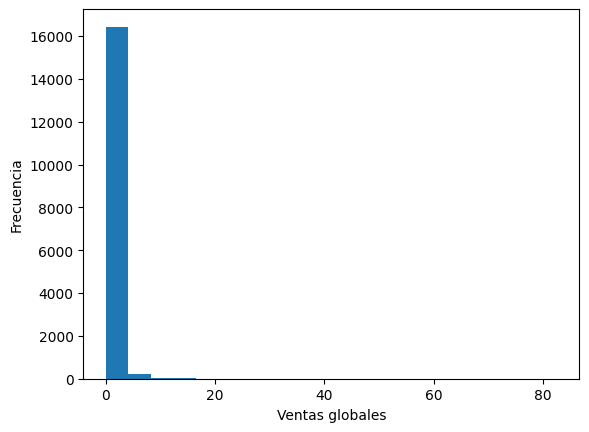

In [32]:
import matplotlib.pyplot as plt
plt.hist(df["Global_Sales"], bins=20)
plt.xlabel("Ventas globales")
plt.ylabel("Frecuencia")
plt.show()

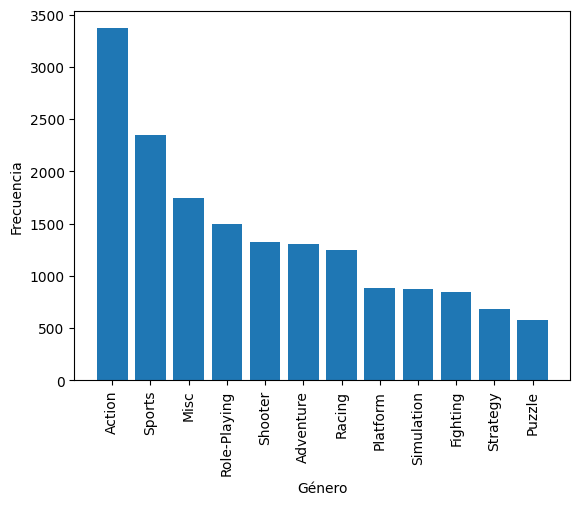

In [33]:
counts = df["Genre"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

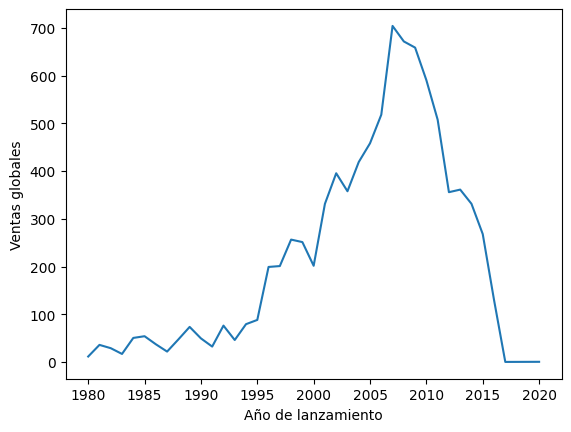

In [34]:
df.groupby("Year_of_Release")["Global_Sales"].sum().plot()
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales")
plt.show()

Identificar los valores atípicos

In [35]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
dtype: int64

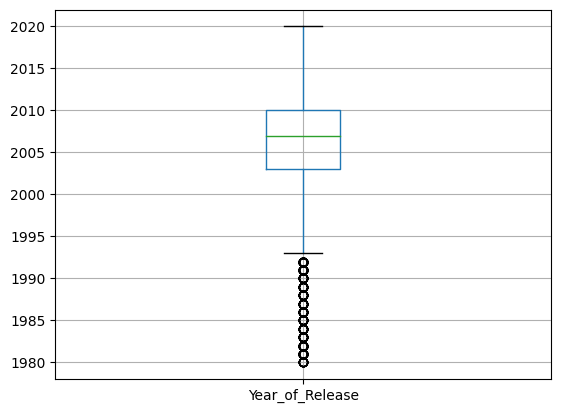

In [40]:
df.boxplot(column=['Year_of_Release'])
plt.show()

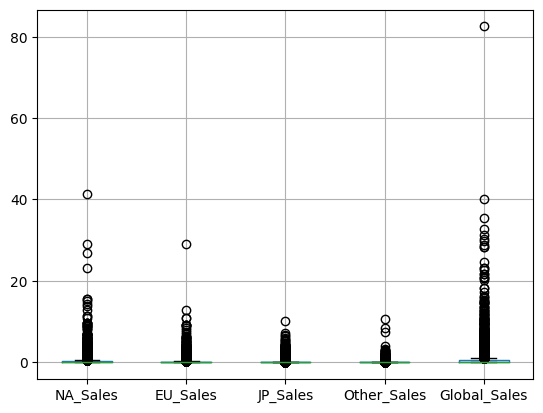

In [43]:
df.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.show()

Mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

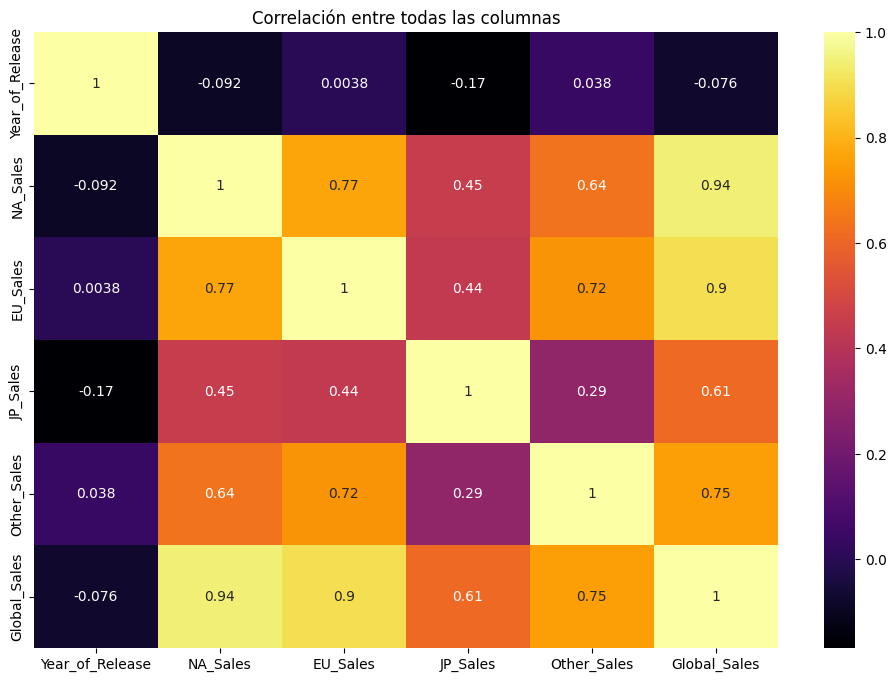

In [46]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlación entre todas las columnas')
plt.show()

Comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron

-Elimine las columnas: User Count, Publisher y Developer porque las considere innecesarais para el objetivo de precirlas ventas de los videojuegos.

-En las columnas Name y Genre  elimine las dos filas con datos faltantes porque eran muy pocos datos faltantes mientras que en Critic_Count, Critic_Score, Rating elimne las columnas porque tenian mas de 50% de datos faltantes

-En las filas User_Score, Year_of_Release lo rellene con la media a ambos

-Busque y junte algunos datos que estaban mal escrito y separados

-A primera instancia se pude ver vastante valores a tipicos
